<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_07_nn_zeroV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [2]:
#-adquicision de los datatset:
#  como los links de los archvios en el GitHub del curso son
#    https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/DataSet/train_catvnoncat.h5
#    https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/DataSet/test_catvnoncat.h5
#  entonces, a sabiendas de que el blob/main indica que estamos viendo el archivo dentro de la interfaz web de GitHub, no su contenido crudo AKA raw, se sigue que
#  si descargamos via ese link, con por ejm wget, tendremos que terminariamos descargando un HTML (la página del archivo), y no el .h5 binario que necesitariamos
#  y que despues vamos a leer con la libreria 5py.
#
#  Es por ello que debemos reemplazar blob/main por raw/main, de esta manera:, <sanchez>-
!wget https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/raw/main/semestre2025-2/Sesiones/DataSet/train_catvnoncat.h5
!wget https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/raw/main/semestre2025-2/Sesiones/DataSet/test_catvnoncat.h5

--2026-02-03 16:01:55--  https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/raw/main/semestre2025-2/Sesiones/DataSet/train_catvnoncat.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/main/semestre2025-2/Sesiones/DataSet/train_catvnoncat.h5 [following]
--2026-02-03 16:01:55--  https://raw.githubusercontent.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/main/semestre2025-2/Sesiones/DataSet/train_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2572022 (2.5M) [application/octet-stream]
Saving to

In [3]:
!file test_catvnoncat.h5

test_catvnoncat.h5: Hierarchical Data Format (version 5) data


In [4]:
data_train = "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [5]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [6]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [7]:
np.shape(xtrain)

(209, 64, 64, 3)

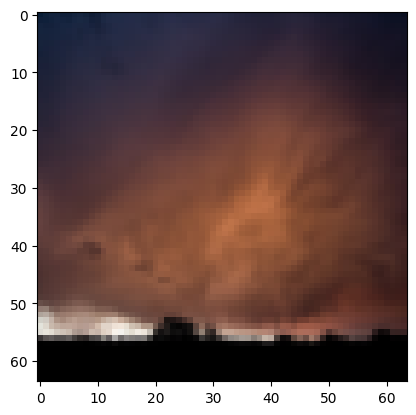

In [8]:
plt.imshow(xtrain[208])

In [9]:
np.shape(xtrain[0])

(64, 64, 3)

In [10]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [11]:

xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [12]:
len(xtrain_[208])

12288

In [13]:
64*64*3

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.

In [ ]:
# @title
import numpy as np
class layer_nn():
    def __init__(self, act_fun, nlayer_presente, nlayer_before):
        self.theta = 2*np.random.random((nlayer_presente, nlayer_before))-1
        self.B = 2*np.random.random((nlayer_presente, 1))-1
        self.act_fun = act_fun


In [ ]:
# @title
def act_funcion(x, activation):
    if activation=="sigmoid":
        f=lambda x: 1/(1+np.exp(-x))
        fp=f(x)*(1-f(x))
        return np.array([f, fp])


CONSIDERE MAS ADECUADO SOLUCIONAR TODO AL FINAL (PARA NO ENREDARME Xd)

In [ ]:
# @title
layer = layer_nn("sigmoid", 3, 3)

In [ ]:
# @title
topology = [12288, 3, 4, 6, 1]
l1 = layer_nn("sigmoid", 3, 10)
l2 = layer_nn("sigmoid", 4, 3)
l3 = layer_nn("sigmoid", 6, 4)
l4 = layer_nn("sigmoid", 1, 6)


In [ ]:
# @title
A0 = xtrain_.T

NameError: name 'xtrain_' is not defined

In [ ]:
# @title
Z1 = l1.theta.T@A0+l1.B

NameError: name 'A0' is not defined



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


# Generalizacion Forward Pass


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}




# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

## **Solucion:**

In [14]:
# Definimos algunas funciones de activación

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def act_function(Z, activation):

    if activation == "sigmoid":
        return sigmoid(Z)
    elif activation == "relu":
        return relu(Z)
    else:
        return Z

# Definimos las derivadas de las funciones de activación

def act_function_prime(dA, Z, activation):

    if activation == "sigmoid":
        s = sigmoid(Z)
        dZ = dA * s * (1 - s)
    elif activation == "relu":
        dZ = dA * (Z > 0).astype(float)
    else:
        dZ = dA
    return dZ

In [15]:
# Clase para cada capa de la red neuronal
class layer_nn:
    def __init__(self, act_fun, nlayer_present, nlayer_before):
        self.act_fun = act_fun
        # Inicialización aleatoria de Theta con escala pequeña
        self.Theta = np.random.randn(nlayer_present, nlayer_before) * 0.01
        # sesgo inicializado en ceros
        self.b = np.zeros((nlayer_present, 1))

    def output(self, A_prev):
        Z = np.dot(self.Theta, A_prev) + self.b
        A = act_function(Z, self.act_fun)
        return Z, A

In [16]:
# Propagación hacia adelante
def forward_pass(A0, nn_red):
    cache = []
    A = A0
    for layer in nn_red:
        A_prev = A
        Z, A = layer.output(A_prev)
        cache.append((A_prev, Z, A))
    return A, nn_red, cache

# Función de costo (entropía cruzada binaria)
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(Y * np.log(AL + 1e-8) + (1 - Y) * np.log(1 - AL + 1e-8))
    return np.squeeze(cost)

# Propagación hacia atrás
def backward_propagation(AL, Y, cache, nn_red):
    grads = []
    m = Y.shape[1]
    L = len(cache)  # Número de capas

    # Derivada para la capa final
    dAL = -(np.divide(Y, AL + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))

    # Backpropagation para la capa final (l = L)
    current_cache = cache[L-1]
    A_prev, Z, A = current_cache
    activation = nn_red[L-1].act_fun
    dZ = act_function_prime(dAL, Z, activation)
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    grads.append({"dW": dW, "db": db})
    dA_prev = np.dot(nn_red[L-1].Theta.T, dZ)

    # Backpropagation para capas ocultas (l = L-1 a 1)
    for l in reversed(range(L-1)):
        current_cache = cache[l]
        A_prev, Z, A = current_cache
        activation = nn_red[l].act_fun
        dZ = act_function_prime(dA_prev, Z, activation)
        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        grads.append({"dW": dW, "db": db})
        dA_prev = np.dot(nn_red[l].Theta.T, dZ)

    grads.reverse()  # Invertimos para alinear con el orden de las capas
    return grads

In [17]:
# Actualización de parámetros con descenso del gradiente
def update_parameters(nn_red, grads, lr0):
    for l in range(len(nn_red)):
        nn_red[l].Theta -= lr0 * grads[l]["dW"]
        nn_red[l].b -= lr0 * grads[l]["db"]
    return nn_red

# Función para predecir (para evaluación)
def predict(X, nn_red):
    AL, _, _ = forward_pass(X, nn_red)
    predictions = (AL > 0.5).astype(int)
    return predictions

# Función de entrenamiento completa
def train_neural_network(X, Y, topology, activations, lr0=0.01, num_iterations=1000, print_cost=True):
    # Construimos la red
    nn_red = []
    for l in range(1, len(topology)):
        nn_red.append(layer_nn(activations[l], topology[l], topology[l-1]))

    costs = []
    for i in range(num_iterations):
        AL, nn_red, cache = forward_pass(X, nn_red)

        # Calculamos el costo
        cost = compute_cost(AL, Y)
        costs.append(cost)

        grads = backward_propagation(AL, Y, cache, nn_red)

        # Actualizamos parámetros
        nn_red = update_parameters(nn_red, grads, lr0)

        if print_cost and i % 100 == 0:
            print(f"Iteration {i}: costo = {cost}")

    return nn_red, costs

In [18]:
# Función que carga los datos
def load_data():
    train_dataset = h5py.File("train_catvnoncat.h5", "r")
    test_dataset = h5py.File("test_catvnoncat.h5", "r")

    xtrain = np.array(train_dataset["train_set_x"][:])
    ytrain = np.array(train_dataset["train_set_y"][:]).reshape(1, -1)

    xtest = np.array(test_dataset["test_set_x"][:])
    ytest = np.array(test_dataset["test_set_y"][:]).reshape(1, -1)

    # Preprocesamiento: aplanamos y normalizamos
    X_train = xtrain.reshape(xtrain.shape[0], -1).T / 255
    X_test = xtest.reshape(xtest.shape[0], -1).T / 255

    return X_train, ytrain, X_test, ytest # Retornamos los datos preprocesaods

In [19]:
# Ejecutamos el pipeline principal

# Cargamos datos
X_train, Y_train, X_test, Y_test = load_data()

# Definimos topología y activaciones
topology = [12288, 20, 7, 5, 1]  # entrada, 3 capas ocultas, salida
activations = [None, "relu", "relu", "relu", "sigmoid"]

# Entrenamos la red
print("Entrenando la red...")
nn_red, costs = train_neural_network(X_train, Y_train, topology, activations, lr0=0.0075, num_iterations=2500)

# Evaluamos en entrenamiento
train_predictions = predict(X_train, nn_red)
train_accuracy = np.mean(train_predictions == Y_train) * 100
print(f"Precisión en entrenamiento: {train_accuracy}%")

# Evaluamos en prueba
test_predictions = predict(X_test, nn_red)
test_accuracy = np.mean(test_predictions == Y_test) * 100
print(f"Precisión en prueba: {test_accuracy}%")

# Imprimimos costos finales (últimos 5)
print("Últimos costos:")
print(costs[-5:])

Entrenando la red...
Iteration 0: costo = 0.6931468972785703
Iteration 100: costo = 0.6780093254451213
Iteration 200: costo = 0.6675975703198133
Iteration 300: costo = 0.6604194912179789
Iteration 400: costo = 0.6554555228084763
Iteration 500: costo = 0.6520113896410957
Iteration 600: costo = 0.6496140199757808
Iteration 700: costo = 0.6479402180934353
Iteration 800: costo = 0.6467683822209874
Iteration 900: costo = 0.6459459633969213
Iteration 1000: costo = 0.6453675288152839
Iteration 1100: costo = 0.6449599330876505
Iteration 1200: costo = 0.6446722534643219
Iteration 1300: costo = 0.6444689267967328
Iteration 1400: costo = 0.6443250473293697
Iteration 1500: costo = 0.6442231302502365
Iteration 1600: costo = 0.6441508743283411
Iteration 1700: costo = 0.6440996092159443
Iteration 1800: costo = 0.6440632140107511
Iteration 1900: costo = 0.6440373617248261
Iteration 2000: costo = 0.6440189899465507
Iteration 2100: costo = 0.6440059291031572
Iteration 2200: costo = 0.6439966408580429
It